## Name - Nyan Hein
## Admission Number - 2340911
## Class - DAAA/FT/1B/01
## Student Segementation Problem

In [1]:
import pandas as pd
df = pd.read_csv('../datasets/Student_Performance_dataset.csv')

## Data Exploration 

In [2]:
## I print the a first few rows to get an understanding of the values of the rows and columns
df.head()

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score
0,1,Female,18,64.0,56.0,60
1,2,Female,12,89.0,71.0,97
2,3,Female,18,69.0,69.0,80
3,4,Female,17,60.0,72.0,97
4,5,Male,13,71.0,76.0,76


In [3]:
## I find the data types because I want to know the data types of each column and to make sure they have the correct
## data type
df.dtypes

Student_ID         int64
Gender            object
Age                int64
English_Score    float64
Math_Score       float64
Science_Score      int64
dtype: object

In [4]:
df.shape

(1000, 6)

**From the above description, the data sets contains 6 columns and 1000 rows, the columns are student id, gender,age, english socre, math score, science score. Gender column has categorical values and the rest are numerical columns**

**Finding the unique value of category column 'Gender'**

In [5]:
df['Gender'].unique()

array(['Female', 'Male', 'Genderqueer', 'Non-binary', 'Agender',
       'Bigender', 'Genderfluid', 'Polygender'], dtype=object)

In [6]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
Female         465
Male           430
Non-binary      21
Genderfluid     19
Genderqueer     18
Bigender        18
Agender         16
Polygender      13
Name: count, dtype: int64


**Since other gender types are only a few number, I will convert them into 'others' gender type category. This is important because it they are not grouped into 'others' gender type category there will be a lot of features when one hot encoding(because gender is nomial categorical type) is performed for clustering and this might lead to Curse of Dimensionality in which each data points seem to be equidistand from others data points.**

In [7]:
### changing other genders into 'others' gender type
low_frequency_genders = ['Non-binary', 'Genderfluid', 'Genderqueer', 'Bigender', 'Agender', 'Polygender']
df['Gender'] = df['Gender'].replace(low_frequency_genders, 'Others')

In [8]:
### now checking the gender values again
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
Female    465
Male      430
Others    105
Name: count, dtype: int64


**Finding The null values**

In [9]:
print(df.isnull().sum())

Student_ID        0
Gender            0
Age               0
English_Score    29
Math_Score       33
Science_Score     0
dtype: int64


**So, English score and math score columns have 29 and 33 null values respectively which will be handled later.**

**Now, I will produce the basic statistics of the data columns because I want to get more insights of the data set, for example, the mean, median which represents the central value of a column and to study the standard deviation to understand the spread of data and max and minium values to understand the range of data and to make sure there is no false data(for example negative score values)**

In [10]:
df.describe()

,Student_ID,Age,English_Score,Math_Score,Science_Score
count,1000.000000,1000.000000,971.000000,967.000000,1000.000000
mean,500.500000,14.970000,76.089598,76.660807,76.370000
std,288.819436,1.959832,12.767113,12.541226,12.866649
min,1.000000,12.000000,55.000000,55.000000,55.000000
25%,250.750000,13.000000,65.000000,66.000000,65.000000
50%,500.500000,15.000000,76.000000,76.000000,77.000000
75%,750.250000,17.000000,88.000000,87.500000,87.000000
max,1000.000000,18.000000,98.000000,98.000000,98.000000


**So, from the above description I can see  
the age range is from 12 to 18 and the mean and the standard deviation are 14.9 and 1.9 so it seems that the age column has fair range of values between 12 to 18.  
For the scores, the minimum and the maximum values for all three cooluns seem to be 55 and 98 and the mean and the standard deviation are also around 76 and 12 and so they seem to have a similar distribution of data.** 

**Now I will perform suitable data visualization to get a more understanding of the data for clustering problem**

## Data Visualization

**Creating box plots and historgrams for english, math and science scores columns to get a better understanding of the  distribution of these scores**

### Box plots and Histograms for The scores of English, Math and Science

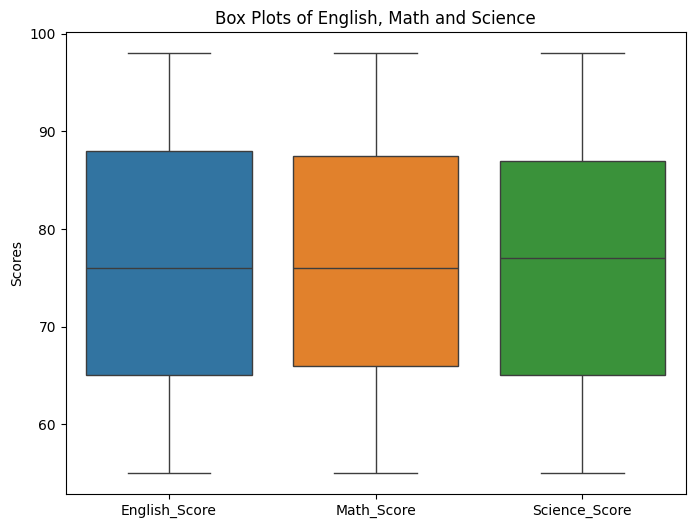

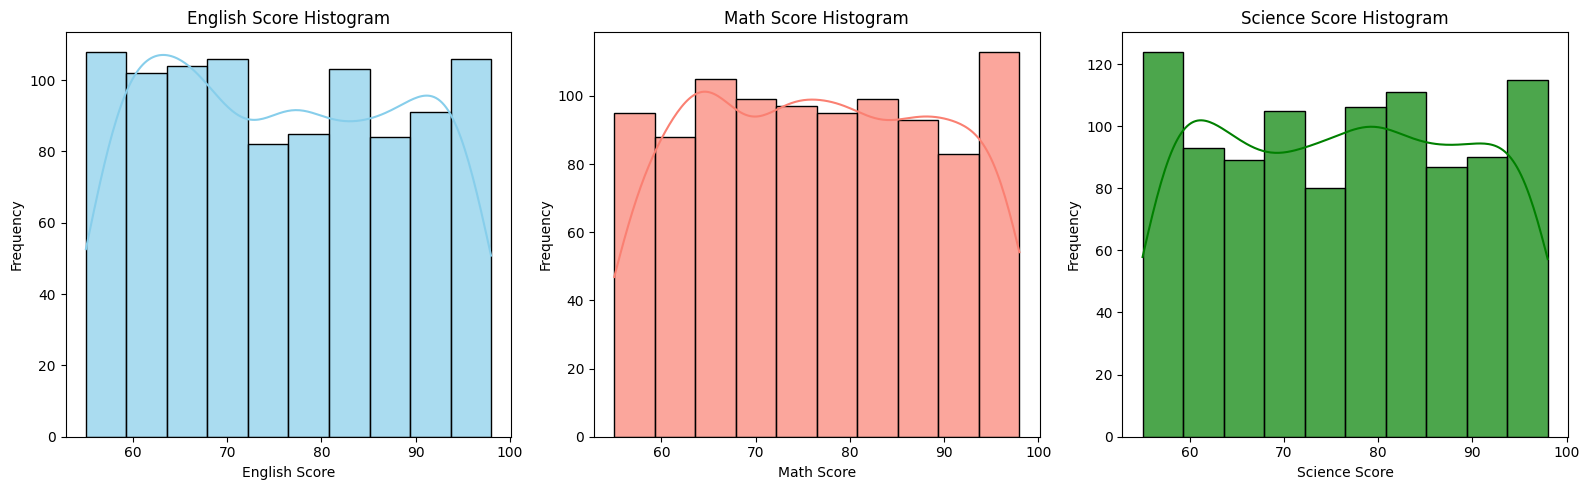

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
## Creating boxplots
fig, ax_box = plt.subplots(figsize=(8, 6))

## Creating box plots
sns.boxplot(data=df[['English_Score', 'Math_Score', 'Science_Score']], ax=ax_box)
ax_box.set_ylabel('Scores')
ax_box.set_title('Box Plots of English, Math and Science')
plt.show()


## Creating histograms
fig, (ax_english, ax_math, ax_science) = plt.subplots(1, 3, figsize=(16, 5))

## For english score
sns.histplot(data=df['English_Score'], bins=10, ax=ax_english, kde=True, alpha=0.7, color='skyblue')
ax_english.set_xlabel('English Score')
ax_english.set_ylabel('Frequency')
ax_english.set_title('English Score Histogram')

## For Math score
sns.histplot(data=df['Math_Score'], bins=10, ax=ax_math, kde=True, alpha=0.7, color='salmon')
ax_math.set_xlabel('Math Score')
ax_math.set_ylabel('Frequency')
ax_math.set_title('Math Score Histogram')

## For Science score
sns.histplot(data=df['Science_Score'], bins=10, ax=ax_science, kde=True, alpha=0.7, color='green')
ax_science.set_xlabel('Science Score')
ax_science.set_ylabel('Frequency')
ax_science.set_title('Science Score Histogram')

plt.tight_layout()
plt.show()

**So, from the box plots, there is no outliers and the distribution of the socres seems to be similar. From the historgrams, for the English socres, there is a high frequency between 55 and 77, and for math score, the student distrtibution is quite similar from 55 to 85 but between 85 and 100 the frequency is higher than other score range. For science, the peaks can see in serveral socres, around 60, 80 and 100.**

### Creatin correlation heatmap to understand the relationship between these scores and age

### Correlation Heat map

In [12]:
### calculating correlation
correlation_matrix = df[['Age', 'English_Score', 'Math_Score', 'Science_Score']].corr()
print(correlation_matrix)


                    Age  English_Score  Math_Score  Science_Score
Age            1.000000      -0.007145   -0.005441      -0.025680
English_Score -0.007145       1.000000   -0.050856      -0.038958
Math_Score    -0.005441      -0.050856    1.000000      -0.024734
Science_Score -0.025680      -0.038958   -0.024734       1.000000


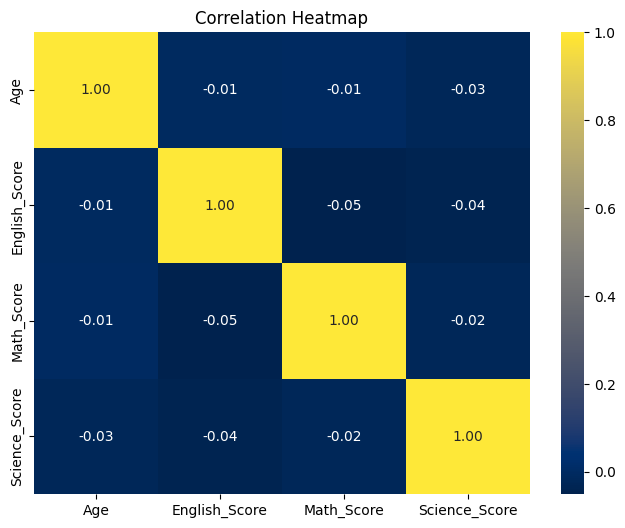

In [13]:
# plotting heat map
plt.figure(figsize=(8, 6))
sns.reset_orig()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cmap='cividis', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

**From the correlation heatmap, the correlation between age and the scores seem to have negative relationship but the scores is too low so that it can be said that there is very little negative or no relationship between the scores and age. Similarly, there is also very little negative or no relationship among english, math and science.
    So, this means that performing good or poorly in one subject does not mean the student will perform well or poorly in other subjects.   
    So, when performing clustering, the expectation is that there wil be less overlapping which means the student in one group where he/she performs well may have average or low scores in other subjects.  
    Since Age does not seem to have any relationship with the scores, it is a fact to consider to remove age feature.**

### Creating boxplots with Gender Values


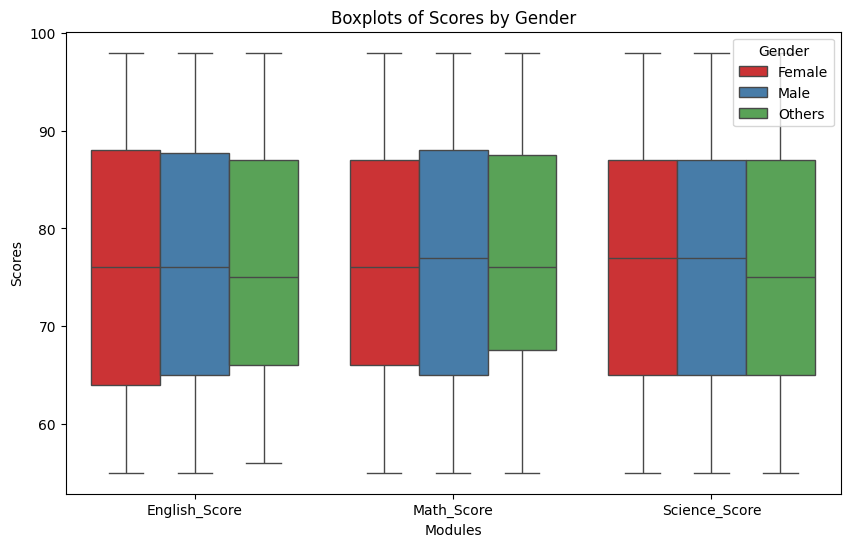

In [14]:
### Transforming data set so that the data set can be used by seaborn library
df_transfomred = df.melt(id_vars=['Student_ID', 'Gender', 'Age'], 
                  value_vars=['English_Score', 'Math_Score', 'Science_Score'], 
                  var_name='Score_Type', 
                  value_name='Score')

##
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_transfomred, x='Score_Type', y='Score', hue='Gender', palette='Set1')
plt.title('Boxplots of Scores by Gender')
plt.xlabel('Modules')
plt.ylabel('Scores')
plt.show()

**So, from the boxplots, that for all three subjects, the gender does not have much affect on their academic performance because the median for all the subjects across all the genders seem to be the same and the distribution is also similar**

## Feature Engineering

**Handling Missing Values** 

**Since the missing values are found in the English score and math score column and there is no outliers, mean values will be used to fill the values**

In [15]:
## filling the null values with mean
df['English_Score'] = df['English_Score'].fillna(df['English_Score'].mean())
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean())

In [16]:
df.isnull().sum()

Student_ID       0
Gender           0
Age              0
English_Score    0
Math_Score       0
Science_Score    0
dtype: int64

**Now, all the null values have been filled**

### Performing one-hot encoding for clustering algorithm 

**I perform one-hot encoding here because the algorithm only understand numerical values and the gender is the nomial categorical value.**

In [17]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(sparse=False)

### encoding gender column 
encodedGender = encode.fit_transform(df[['Gender']])
### transforming array into data frame
df_encodedGender = pd.DataFrame(encodedGender, columns=encode.get_feature_names_out(['Gender']))
## merging the data frames
df_with_encodedGender = pd.concat([df, df_encodedGender], axis=1)
## dropping the gender column
df_with_encodedGender.drop('Gender', axis=1, inplace=True)

print(df_with_encodedGender)

     Student_ID  Age  English_Score  Math_Score  Science_Score  Gender_Female  \
0             1   18           64.0        56.0             60            1.0   
1             2   12           89.0        71.0             97            1.0   
2             3   18           69.0        69.0             80            1.0   
3             4   17           60.0        72.0             97            1.0   
4             5   13           71.0        76.0             76            0.0   
..          ...  ...            ...         ...            ...            ...   
995         996   14           64.0        55.0             77            1.0   
996         997   14           66.0        60.0             56            0.0   
997         998   16           82.0        81.0             74            0.0   
998         999   14           76.0        62.0             62            0.0   
999        1000   16           77.0        97.0             60            1.0   

     Gender_Male  Gender_Ot

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Beform Performing Clustering, Standardize the score and age columns using z-score standardization

In [18]:
## Performing standardization
from sklearn.preprocessing import StandardScaler
columns_toBeStandardized = ['Age', 'English_Score', 'Math_Score', 'Science_Score']
scaler = StandardScaler()
df_with_encodedGender[columns_toBeStandardized] = scaler.fit_transform(df_with_encodedGender[columns_toBeStandardized])

print(df_with_encodedGender)

     Student_ID       Age  English_Score  Math_Score  Science_Score  \
0             1  1.546825      -0.961465   -1.676173      -1.272918   
1             2 -1.516194       1.026742   -0.459251       1.604172   
2             3  1.546825      -0.563823   -0.621507       0.282266   
3             4  1.036321      -1.279578   -0.378123       1.604172   
4             5 -1.005691      -0.404767   -0.053610      -0.028771   
..          ...       ...            ...         ...            ...   
995         996 -0.495188      -0.961465   -1.757301       0.048988   
996         997 -0.495188      -0.802408   -1.351660      -1.583955   
997         998  0.525818       0.470044    0.352031      -0.184289   
998         999 -0.495188      -0.007126   -1.189404      -1.117400   
999        1000  0.525818       0.072403    1.650081      -1.272918   

     Gender_Female  Gender_Male  Gender_Others  
0              1.0          0.0            0.0  
1              1.0          0.0            0.0  


In [19]:
df_for_clustering = df_with_encodedGender

In [20]:
df_for_clustering

,Student_ID,Age,English_Score,Math_Score,Science_Score,Gender_Female,Gender_Male,Gender_Others
0,1,1.546825,-0.961465,-1.676173,-1.272918,1.0,0.0,0.0
1,2,-1.516194,1.026742,-0.459251,1.604172,1.0,0.0,0.0
2,3,1.546825,-0.563823,-0.621507,0.282266,1.0,0.0,0.0
3,4,1.036321,-1.279578,-0.378123,1.604172,1.0,0.0,0.0
4,5,-1.005691,-0.404767,-0.053610,-0.028771,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
995,996,-0.495188,-0.961465,-1.757301,0.048988,1.0,0.0,0.0
996,997,-0.495188,-0.802408,-1.351660,-1.583955,0.0,0.0,1.0
997,998,0.525818,0.470044,0.352031,-0.184289,0.0,1.0,0.0
998,999,-0.495188,-0.007126,-1.189404,-1.117400,0.0,1.0,0.0


## Modelling 

In [21]:
## dropping unnessary columns
df_for_clustering.drop(columns=['Student_ID'],inplace=True)

**Find the best k for the K-means clustering**

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
## Since the problem is for student segmentation, 2 to 6 clusters should be enough
cluster_range = range(2, 10)  

scores_silhouette = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_for_clustering)  
    kmeans_silhouette = silhouette_score(df_for_clustering, kmeans_labels)
    scores_silhouette.append(kmeans_silhouette)
    
best_kmeans_clusters = cluster_range[scores_silhouette.index(max(scores_silhouette))]
print(f'Silhouette scores {scores_silhouette}\n')
print("Best number of clusters for K-means:", best_kmeans_clusters)
print("K-means Silhouette Score:", max(scores_silhouette))

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

Silhouette scores [0.15975860539341002, 0.15299023835494496, 0.16404520666697248, 0.16552038730861016, 0.16704840963938308, 0.17414692071861781, 0.17833896748295364, 0.17026602080431547]

Best number of clusters for K-means: 8
K-means Silhouette Score: 0.17833896748295364


**Now, finding the number of best cluster using the Elbow method**

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

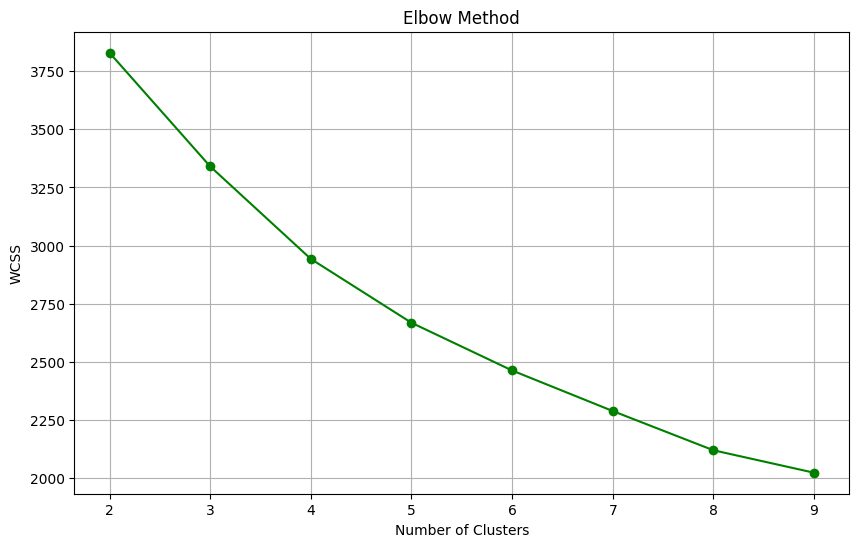

In [24]:
wcss = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_for_clustering)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='g')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

**So, from Silhouette Score, the 8 clusters have the highest score, but the socres does not have much difference. from the Elbow method there seems to be no clear answer for the best number of clusters, I will try other number of clusters too because the score is not much difference and since this is the student segmentation I expect the few number of clusters**


## Performing Clustering Using K Means Clustering and Cluster Analysis

In [32]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0).fit(df_for_clustering)
## getting the labels
df_with_clusters = df
df_with_clusters['clusters'] = kmeans.labels_

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [33]:
df_with_clusters

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score,clusters
0,1,Female,18,64.0,56.0,60,1
1,2,Female,12,89.0,71.0,97,4
2,3,Female,18,69.0,69.0,80,2
3,4,Female,17,60.0,72.0,97,2
4,5,Male,13,71.0,76.0,76,3
...,...,...,...,...,...,...,...
995,996,Female,14,64.0,55.0,77,4
996,997,Others,14,66.0,60.0,56,1
997,998,Male,16,82.0,81.0,74,1
998,999,Male,14,76.0,62.0,62,4


In [49]:
### defining a function to analyze the nature of clusters
def clusterNatureAnalysis(df):

    ## finding Cluster Distribution
    cluster_distribution = df['clusters'].value_counts().sort_index()
    print("Cluster Distribution:")
    print(cluster_distribution)

    ## finding the Gender Distribution for each cluster
    gender_distribution = df.groupby(['clusters', 'Gender']).size().unstack()
    print("\nGender Distribution per Cluster:")
    print(gender_distribution)

    ## finding Age Distribution per Cluster
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='clusters', y='Age', data=df)
    plt.title('Age Distribution per Cluster')
    plt.show()
    ### finding score Distributions per Cluster
    score_columns = ['English_Score', 'Math_Score', 'Science_Score']
    for score_col in score_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='clusters', y=score_col, data=df)
        plt.title(f'{score_col} Distribution per Cluster')
        plt.show()

    ### finding the avearage score
    average_scores = df.groupby('clusters')[score_columns].mean()
    print("\nAverage Scores per Cluster:")
    print(average_scores)

Cluster Distribution:
clusters
0    168
1    214
2    213
3    181
4    224
Name: count, dtype: int64

Gender Distribution per Cluster:
Gender    Female  Male  Others
clusters                      
0             73    76      19
1            104    90      20
2            114    76      23
3             76    86      19
4             98   102      24


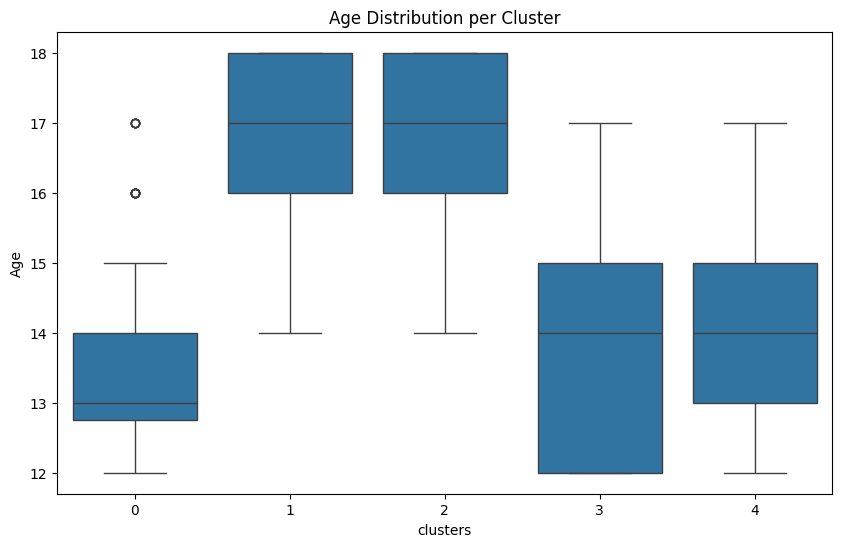

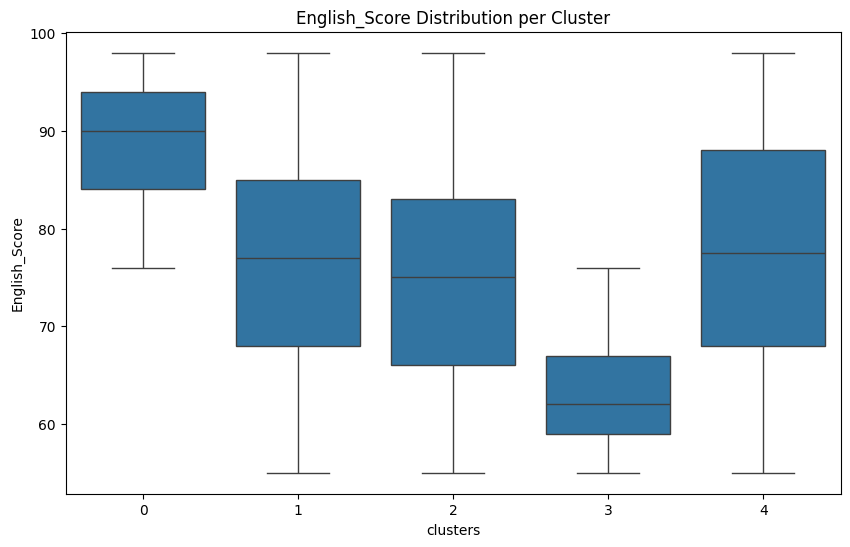

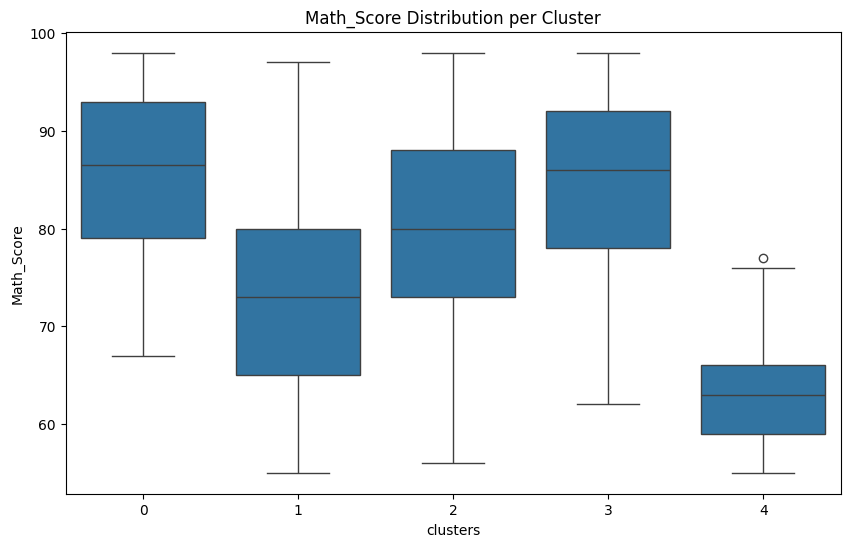

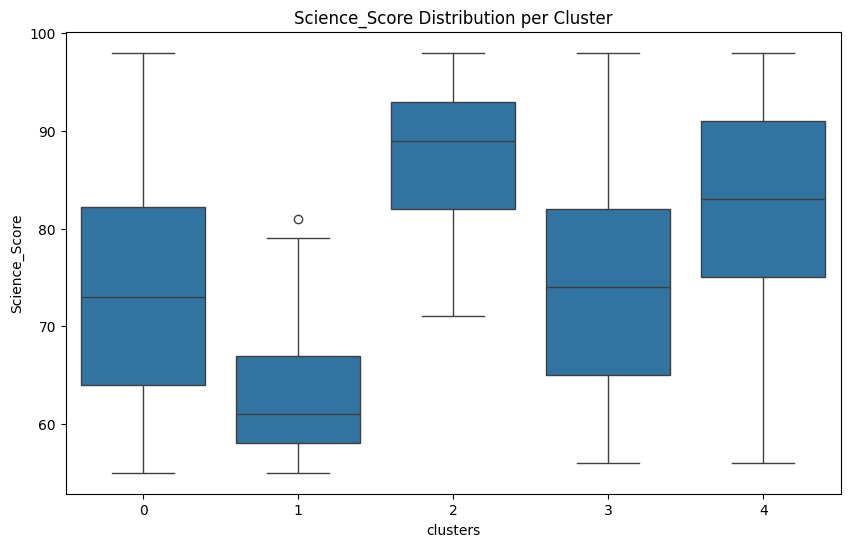


Average Scores per Cluster:
          English_Score  Math_Score  Science_Score
clusters                                          
0             88.659028   85.922410      74.005952
1             76.806669   73.424987      62.742991
2             74.739613   80.210937      87.788732
3             62.839779   84.690413      74.259669
4             77.967486   62.941964      82.008929


In [50]:
clusterNatureAnalysis(df_with_clusters)

**So, while I performed clustering using k=5, each cluster has following characteristics:  
The gender distribution is no much difference, all seems to equal distribution of gender and it is the smallest cluster.
Cluster 0: This cluster has youger students(from age 12 and 15), they seem to perform well in all subjects  
Cluster 1: This cluster and cluster 0 has older students(starting from age 14) but this group is in academically low performance.  
Cluster 2: This cluster has high academic performance. 
Cluster3 and cluster 4 has perform well in math and science respectively and perform average in other subjects. And this clustering of using k = 5 does not show the characters that can distinguish between clusters**

### Performing 4 differnet clusters

In [51]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0).fit(df_for_clustering)
## getting the labels
df_with_4_clusters = df
df_with_4_clusters['clusters'] = kmeans.labels_

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Cluster Distribution:
clusters
0    245
1    245
2    257
3    253
Name: count, dtype: int64

Gender Distribution per Cluster:
Gender    Female  Male  Others
clusters                      
0            130    92      23
1            103   113      29
2            121   110      26
3            111   115      27


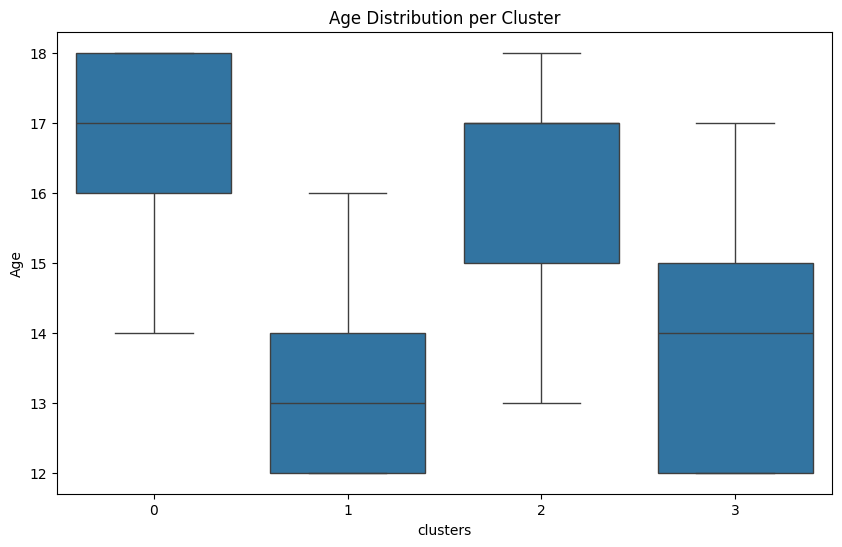

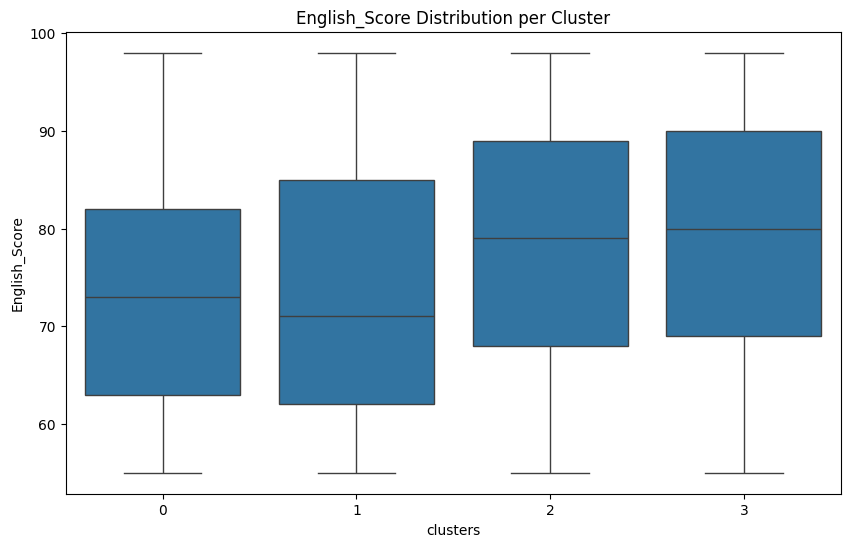

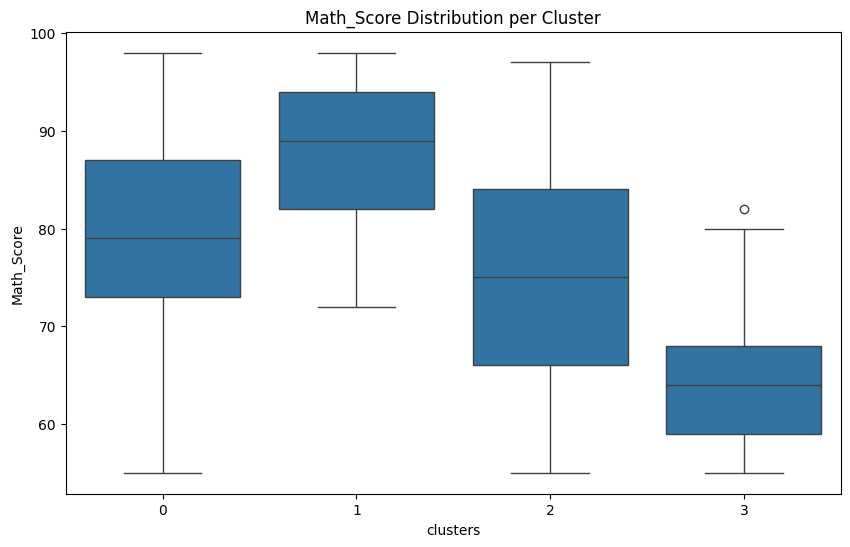

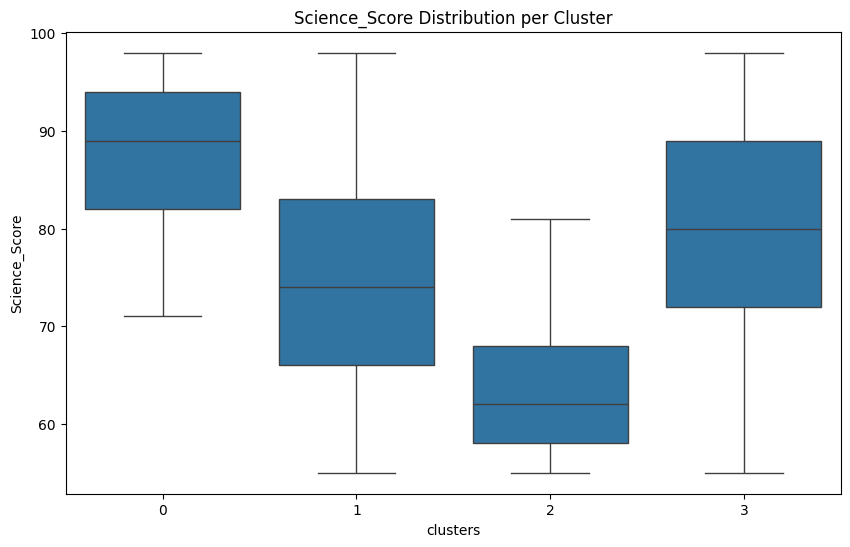


Average Scores per Cluster:
          English_Score  Math_Score  Science_Score
clusters                                          
0             73.231131   79.444611      87.991837
1             73.680477   88.021577      74.918367
2             78.418783   75.320112      63.256809
3             78.824613   64.325382      79.841897


In [52]:
clusterNatureAnalysis(df_with_4_clusters)

### Performing 6 clusters


In [55]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=6, n_init=10, random_state=0).fit(df_for_clustering)
## getting the labels
df_with_6_clusters = df
df_with_6_clusters['clusters'] = kmeans.labels_

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Cluster Distribution:
clusters
0    140
1    159
2    150
3    198
4    192
5    161
Name: count, dtype: int64

Gender Distribution per Cluster:
Gender    Female  Male  Others
clusters                      
0             63    64      13
1             64    79      16
2             63    68      19
3             95    83      20
4            104    68      20
5             76    68      17


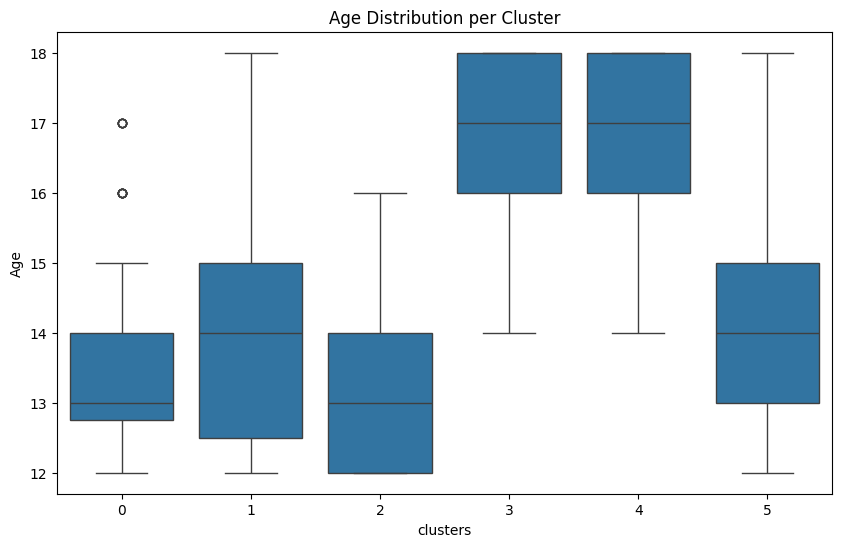

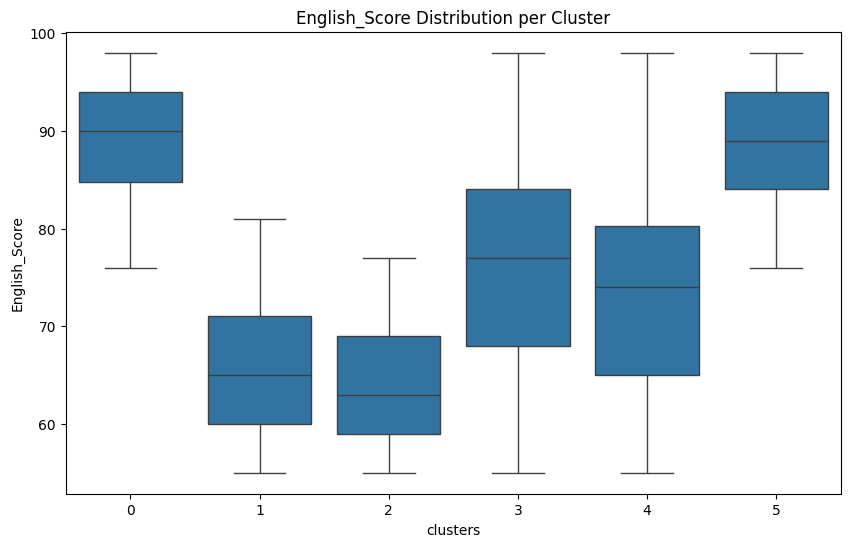

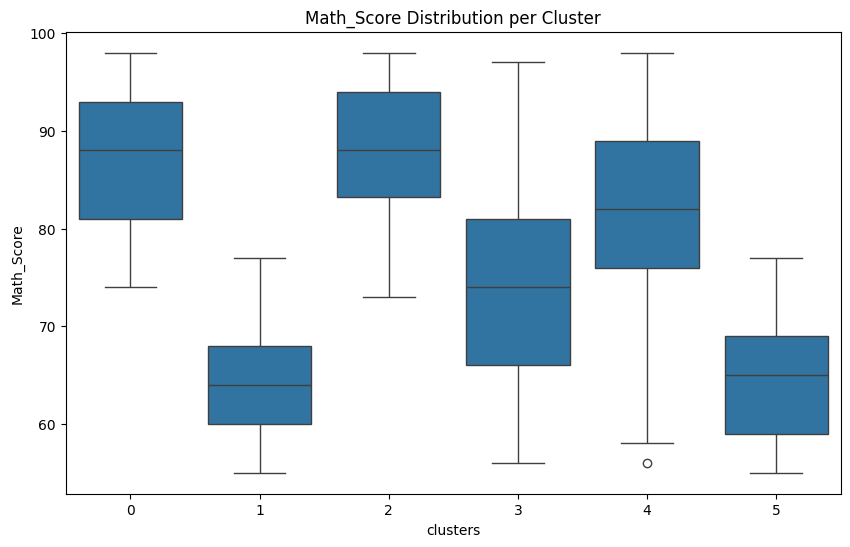

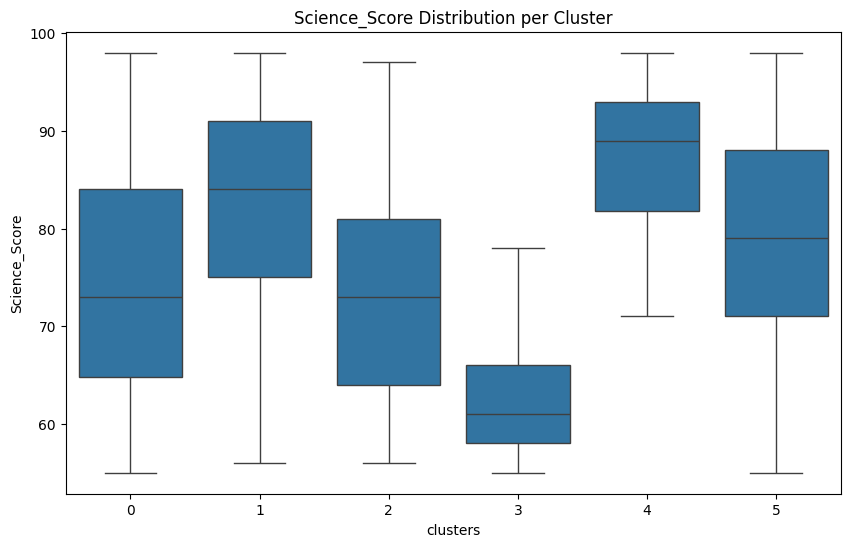


Average Scores per Cluster:
          English_Score  Math_Score  Science_Score
clusters                                          
0             88.986994   87.316457      74.721429
1             65.682626   64.576372      82.201258
2             64.276917   88.253216      73.306667
3             76.018319   74.688227      62.303030
4             73.867383   81.970242      87.619792
5             88.895523   64.623116      78.782609


In [56]:
clusterNatureAnalysis(df_with_6_clusters)

### Performing 8 clusters

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Cluster Distribution:
clusters
0    123
1    119
2    141
3    108
4    144
5    135
6    124
7    106
Name: count, dtype: int64

Gender Distribution per Cluster:
Gender    Female  Male  Others
clusters                      
0             62    47      14
1             54    55      10
2             73    52      16
3             43    54      11
4             62    66      16
5             72    53      10
6             58    48      18
7             41    55      10


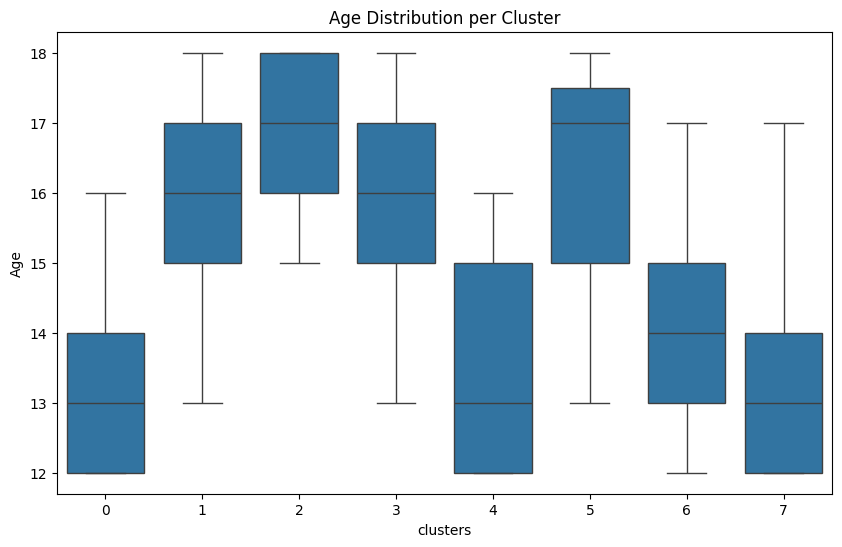

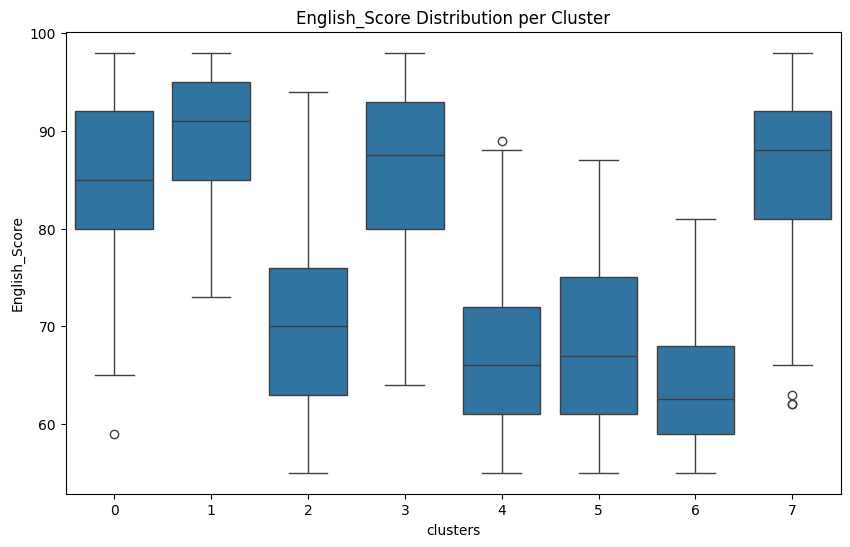

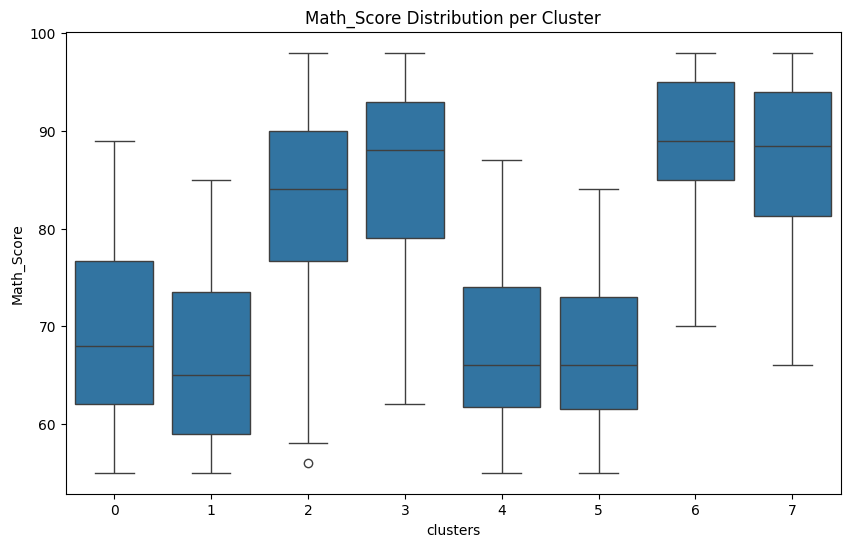

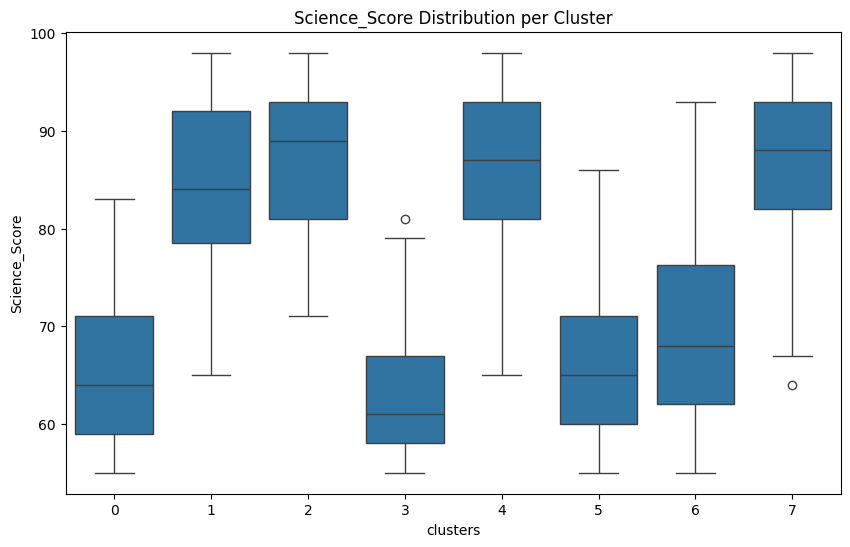


Average Scores per Cluster:
          English_Score  Math_Score  Science_Score
clusters                                          
0             85.073899   69.547187      65.170732
1             89.757055   66.907268      84.554622
2             69.719489   83.255194      87.553191
3             86.168326   86.197260      62.814815
4             66.892000   67.573911      86.527778
5             67.812053   67.325665      65.962963
6             63.882645   89.080503      69.403226
7             85.842158   87.081706      86.716981


In [59]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=8, n_init=10, random_state=0).fit(df_for_clustering)
## getting the labels
df_with_8_clusters = df
df_with_8_clusters['clusters'] = kmeans.labels_
clusterNatureAnalysis(df_with_8_clusters)

**With the number of clusters increased, the clusters with low academic performance becomes more visible. By the interpretation of these 8 clusters,  
all the clusters have approximately equal number and also have the same distribution of gender which I means is no dominant of one gender can be seen in each cluster.
In terms of academic performance,  
cluster 0: This cluster have high english score but low scores in Math and Science, and from the distribution they are younger students, so for this student cluster, they need to improve more in Math and Science.   
cluster 1: This cluster have high performance in English, Science but low performance in Math and a wide range of age can see in this group.  
cluster 2: This cluster have low performance in English and high performance in Math and Science and they are from older groups. 
cluster 3: This cluster have high performance in English and Math and low perfromance in Science.  
Cluster 4,5 and 6 have low performance in academic and cluster 5 is low performance in all subjects and Cluster 7 has the highest performance.**

### Using Hierachial Clustering

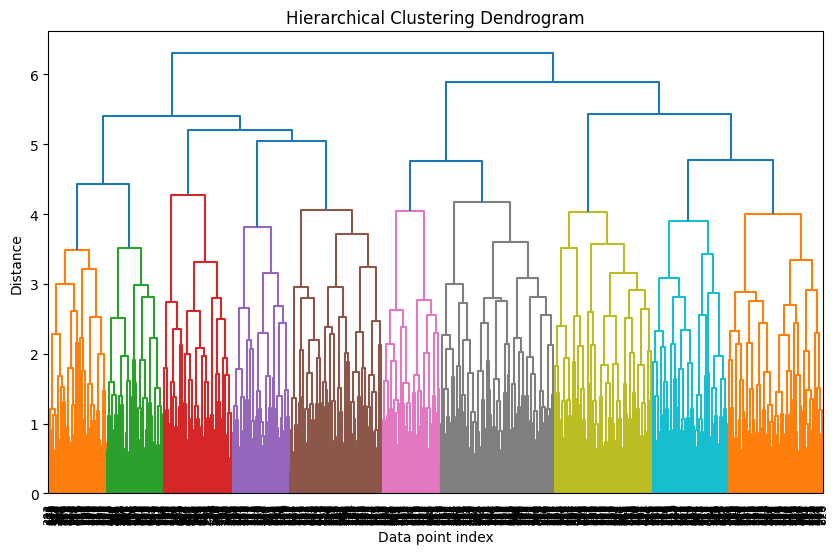

In [65]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
## use the method complete to maximise the disimilarity 
linkage_matrix = linkage(df_for_clustering, method='complete', metric='euclidean')

# producing dendrogram to determine the cut-off distance
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix,leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.show()


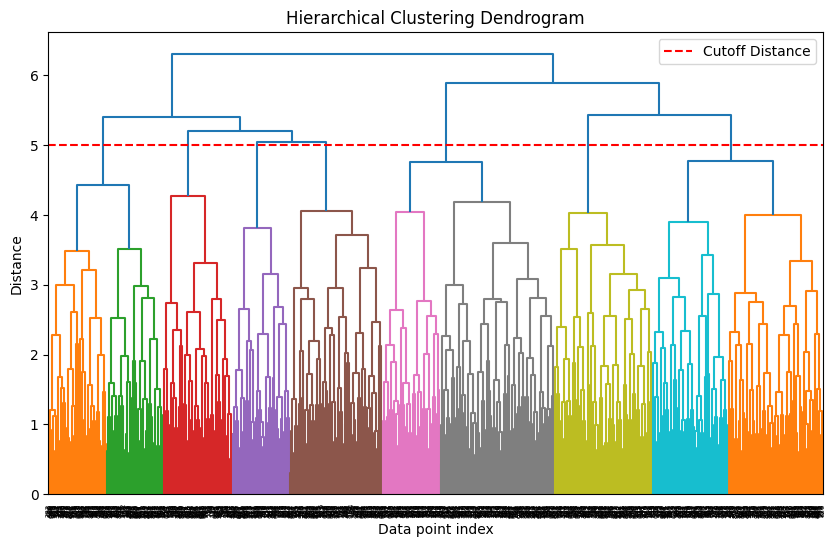

In [79]:
## deciding the cut off distance to be four 
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Distance')

# Plot a horizontal line at the cutoff distance
plt.axhline(y=5, color='r', linestyle='--', label='Cutoff Distance')

plt.legend()
plt.show()

**used the cut-off distance 5, this seems to be a good cut off distance because it will not give many clusters since the main focus is to find the cluster of students which needs more attention , below than that will produce many clusters**

In [86]:
## performing clustering using cut-off distance 4.3 and 
cutoff_distance = 5
cluster_labels = AgglomerativeClustering(n_clusters=None, distance_threshold=cutoff_distance, linkage='complete')
.fit_predict(df_for_clustering)

df_with_clusters_hierachial =  df
df_with_clusters_hierachial['clusters'] = cluster_labels

# Print the count of data points in each cluster
print(df_with_clusters_hierachial['clusters'].value_counts())

clusters
2    222
0    220
1    149
3    126
4    120
5     89
6     74
Name: count, dtype: int64


**Calculating Silhouette score for this clusters**

In [87]:
silhouette_avg = silhouette_score(df_for_clustering, cluster_labels)
print("The average silhouette_score for Hierachial Clustering with cut-off distance 5 is :", silhouette_avg)

The average silhouette_score for Hierachial Clustering with cut-off distance 5 is : 0.08204797286102124


### performing cluster analysis

Cluster Distribution:
clusters
0    220
1    149
2    222
3    126
4    120
5     89
6     74
Name: count, dtype: int64

Gender Distribution per Cluster:
Gender    Female  Male  Others
clusters                      
0            121    77      22
1             68    70      11
2             95   102      25
3             36    74      16
4             63    35      22
5             45    39       5
6             37    33       4


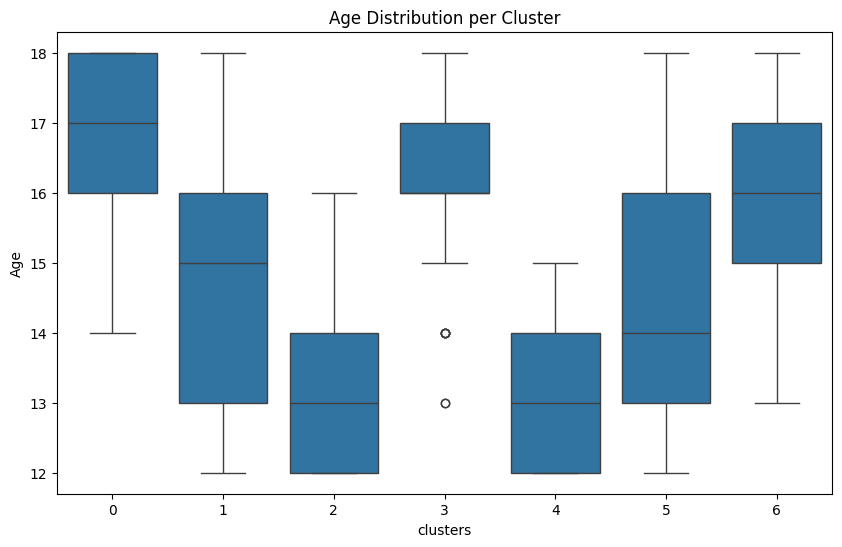

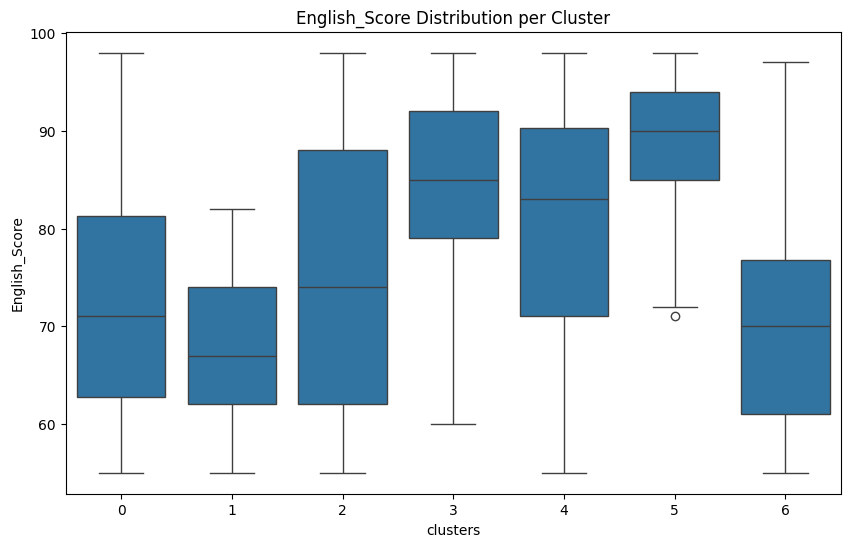

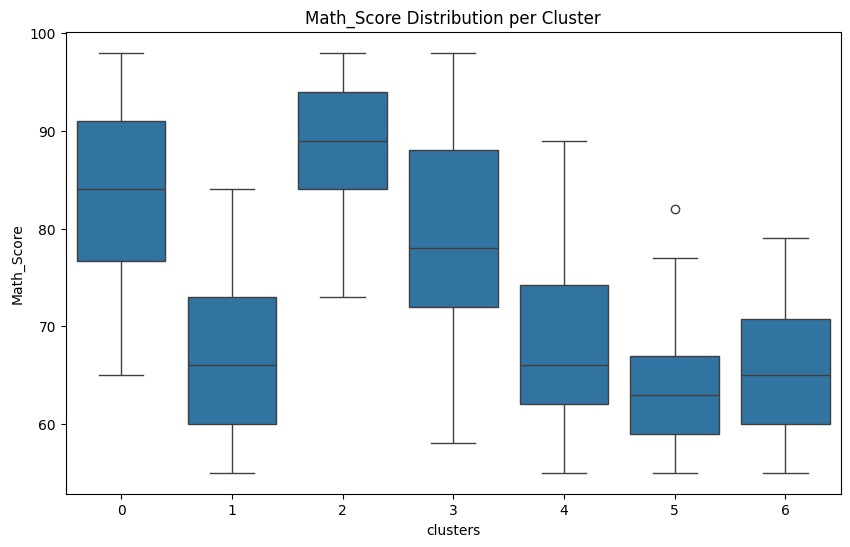

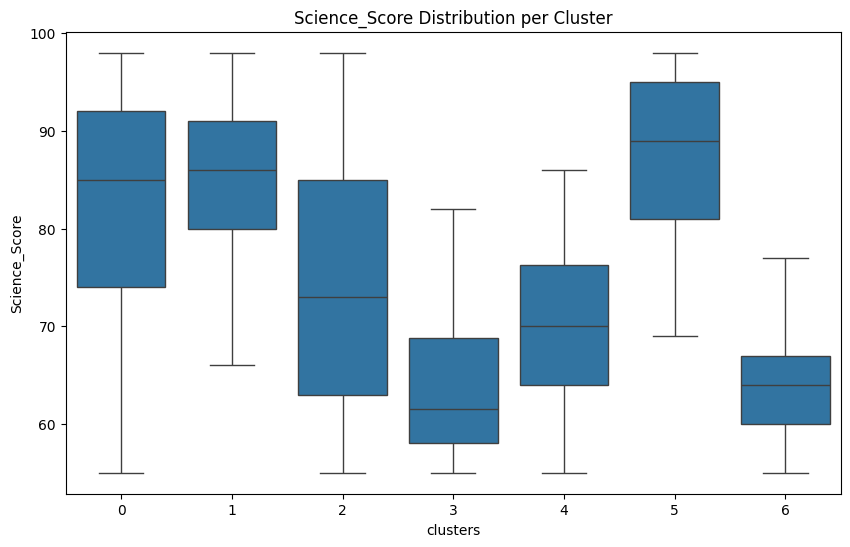


Average Scores per Cluster:
          English_Score  Math_Score  Science_Score
clusters                                          
0             72.578495   83.842051      82.345455
1             67.567366   66.749283      85.751678
2             75.071604   88.345240      74.608108
3             84.715708   79.581778      63.936508
4             80.825000   67.994200      69.708333
5             88.194031   63.370787      87.483146
6             69.816865   65.279200      63.608108


In [88]:
clusterNatureAnalysis(df_with_clusters_hierachial)

**From the above data, the following analysis can be done for the 6 clusters 
the cluster size is different from other clusters, not like K means clustering where clustering number is quite the same for all the clusters. 
cluster 0: This cluster has a good academic performance and there are high number of males than females, others gender only contribute a small proportion and their age distribution starts from 14 to 18  
cluster 1: This cluster is low performance in English and Math but good in Science, male and female number are almost the same, they have all age ranges  
cluster 2: This cluster also have a good acadmeic performance but this group scores highest in Math and have almost same number of gender.  
cluster 3: This cluster has good performance in English and math but low performance in Science, and the age group is between 15 and 18 years and gender ratio is in favor of male.  
cluster 4: This cluster has high performance in english but low in Math and Science and there is younger age group.  
cluster 5: This cluster has low performance in Math but good in Eng and Sci, and the age group contains all the groups,   
cluster 6: This group has quite low performacne in all subjects and and the age group is between 13 and 18 and this is the samllest cluster. So, this cluster needs more attention. But this hierachial clustering is not a good clustering because its average silhouette score is 0.082 which is quite low so there is considerable overlap between groups.**

**Conclusion  
So, K Means clustering with cluster number = 8 seems to be the best clustering because it has highest silhouette score and it also can capture the students with low performance in the subjects but it is hard to relate the academic performance with age and gender group because they seem to have similar distribtion of age and gender in K means clustering. And also from the data exploaration steps there is no correlation between age and academic peformance so it is hard to capture those kinds of relationship in the clusters**
